# Лабораторная работа $№2$

## **Цель работы**
Цель работы – практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## **Данные для работы**
1) Средствами ОС Windows записать свой речевой сигнал.  
2) Фраза — Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных технологий и информатики.  
3) Формат записи — моно-сигнал, $16000$ гц или $22000$ гц, без сжатия (wav-формат).  

## **Задачи лабораторной работы**

1) Используя ДПФ построить траекторию основного тона $(F_0)$ на записи своего голоса.  
2) Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.  
3) Построить сонограмму по записи своего голоса.  

In [2]:
from google.colab import drive
drive.mount('/content/drive/') # монтируем папку своего гугл диска

Mounted at /content/drive/


### **Построение траектории основного тона на записи голоса**

Частотой основного тона (F0) называют частоту вибрации голосовых связок. У каждого
говорящего базовая частота основного тона индивидуальна и обусловлена особенностями
строения гортани. Частота основного тона различна для мужских (примерный диапазон:
80− 200 Hz) и женских (примерный диапазон: 160− 350 Hz) голосов.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: WavFileWarning: Reached EOF prematurely; finished at 264924 bytes, expected 2147418156 bytes from header.
  


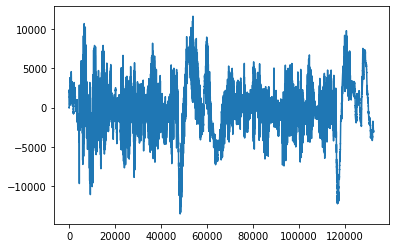

In [3]:
from scipy.io import  wavfile
import numpy as np
import matplotlib.pyplot as plt
import more_itertools as mit
# load signal
sample_rate, data = wavfile.read('/content/drive/MyDrive/Colab_Notebooks/mp/mp_lab2.wav')
plt.plot(data)

In [4]:
def DFT(signal):
    X = []
    wn = np.exp(2 * np.pi / len(signal))
    for k in range(len(signal)):
        X.append(np.sum([signal[j] * (wn ** (-k * j)) for j in range(0, len(signal))]))
    return X    
    
N = 2**8
overlap = 0.125
Sr = int(sample_rate / N)
#split signal into intervals
intervals = list(mit.windowed(data, n=N, step=int(overlap*N)))
intervals[-1] = [i for i in intervals[-1] if i]
#multiply by hamming window
intervals = [interval * np.hamming(len(interval)) for interval in intervals]
#compute DFT for intervals
intervals = [DFT(interval) for interval in intervals]
#compute amplitude spectrum on intervals
amplitude_spectrum = [sum([j**2 for j in interval[:int(len(interval)/2)]])**0.5 for interval in intervals]
amplitude_spectrum = np.array([i.real for i in amplitude_spectrum])

#make generator for arr
def gen_chunks(arr, n):
    for i in range(0, len(arr), n):
        yield arr[i:i + n]

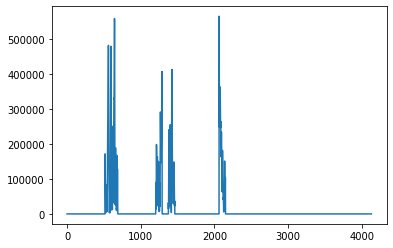

In [ ]:
F0 = []
for i in gen_chunks(amplitude_spectrum, Sr):
    segment = np.array(i)
    if segment.max() > segment.mean() * 3:            
        F0 += segment.tolist()
    else:
        F0 += [0 for i in range(len(segment))]
plt.plot(F0)            

### **Построение второй, третьей и четвертой формантных частот**



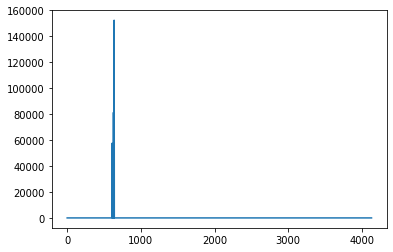

In [ ]:
F1 = []
for i in range(len(F0)):
    try:
        max_interv = max([F0[2*i], F0[2*i-1], F0[2*i+1]])
        if F0[i] > max_interv * 2:           
            F1.append(max_interv)
        else:
            F1.append(0)
    except:
        F1.append(0)  
plt.plot(F1)      

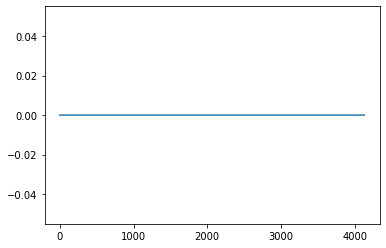

In [ ]:
F2 = []
for i in range(len(F0)):
    try:
        max_interv = max([F0[3*i], F0[3*i-1], F0[3*i+1]])
        if F0[i] > max_interv * 4:           
            F2.append([max_interv])
        else:
            F2.append([0])
    except:
        F2.append([0])
plt.plot(F2)        

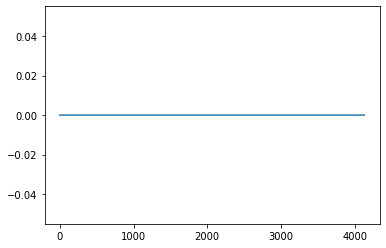

In [ ]:
F3 = []
for i in range(len(F0)):
    try:
        max_interv = max([F0[4*i], F0[4*i - 1], F0[4*i + 1]])
        if F0[i] > max_interv * 8:           
            F3.append([max_interv])
        else:
            F3.append([0])
    except:
        F3.append([0])
plt.plot(F3)        

### **Построение сонограммы на записи голоса**

In [16]:
import plotly.express as px
intervals = list(mit.windowed(amplitude_spectrum, n=round(sample_rate/N), step=round(sample_rate/N)))
intervals[-1] = [i for i in arrs[-1] if i]
for i in intervals:
    for j in range(len(i)):
        if i[j] > 4e6:
            i[j] = 0
plot_arr = np.array(intervals[:-1], dtype=float)
fig = px.imshow(plot_arr)
fig.show()

# Выводы

Используя ДПФ были построены первая, вторая, третья и четвёртая траектории основного тона на записи своего голоса. Последние две отсутвуют. Была построена сонограмма по записи своего голоса. 